In [19]:
# Instalar las librerías necesarias
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor, Button
import numpy as np
from math import *
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter


# Determinación del dp de trabajo

In [2]:
# Funcion para extraer y procesar la información obtenida experimentalmente
def read_process_data(Archive, muestra, blanco):
    # Lectura de datos experimentales
    data = pd.read_csv(Archive)
    # Save readings into a dictionary
    dic = {'Weight': list(data.loc[:, 'Peso']), 'Concentraciones': list(data.loc[:, 'Concentration']-blanco), 'psize': list(data.loc[:, 'Particle size'])}
    # Generate dataframe for data processing
    Data = pd.DataFrame(dic)
    # DATA PROSSESING
    # Contenido de oro en mg/tonelada, para determinar esto se emplea la siguiente relación
    # content = (Atomic Absorption result [mg/L] * 1g / 1000 mg * 1 L/1000 mL * 10mL) / (sample mass g * 1 ton /1e6 g )
    Au_concentration = np.array([i / 3 for i in list(Data['Concentraciones'])])
    # Concentration yield
    #           Base mineral concentration [g/ton]
    Base_concentration = 0.22
    ley_recalculada = sum(Data['Concentraciones']*10)/muestra
    # Contenido de oro
    print(ley_recalculada)
    print(sum(Data['Weight']))
    Au_content = np.array([i*j/1e6 for i,j in zip(Au_concentration, Data['Weight'])])
    # Porcentaje de recuperación
    Yield_concentration = np.array([(i)/sum(Au_content)*100 for i in Au_content])
    # Save results into a dataframe
    dic_1 = {'Mesh': list(data.loc[:,'Mesh']),
             'Particle size': list(Data['psize']),
             'Peso': Data['Weight'],
             'Yield': Yield_concentration,
             'Law': Au_concentration,
             'Contenido': Au_content}
    Results = pd.DataFrame(dic_1)
    # Generar archivo de resultados
    Results.to_csv('Resultados_%s.csv' %(muestra))
    #Anàlisis harry
    Contenido = [i*j for i, j in zip(dic_1['Law'], dic_1['Peso'])]
    print('Contenido')
    print(sum(Contenido))
    # Recuperación acumulada
    Recuperacion_acumulada = [dic_1['Yield'][0]]
    for i in range(len(dic_1['Yield'])-1):
        Recuperacion_acumulada.append(Recuperacion_acumulada[i] + dic_1['Yield'][i+1])
    #Cabeza Recalculada
    print ('Cabeza recalculada')
    Cabeza_recalculada = sum(Au_content)/((sum(dic_1['Peso']))/1e6)
    print(Cabeza_recalculada)
    return Results, Recuperacion_acumulada, Cabeza_recalculada
    

In [3]:
# funcion para determinar valores en las distintas gráficas
def data_exploration(x, y):
    Interpolation_curve = CubicSpline(x,y)
    return Interpolation_curve

In [7]:
print('='*10, '\n',  'P6', '\n', '='*10)
(Results_P6, Recuperacion_acumulada_P6, Cabeza_recalculada_P6) = read_process_data('../data/Gold_size/Datos_dp_P6.csv', 2000, 0.02)
print(Results_P6)
print('='*10, '\n',  'BP', '\n', '='*10)
(Results_BP, Recuperacion_acumulada_BP, Cabeza_recalculada_BP) = read_process_data('../data/Gold_size/Datos_dp_BP.csv', 2000, 0.02)
#Mostrar resultados obtenidos

#print('Recuperación Acumulada')
#print(Recuperacion_acumulada_P6)

 P6 
0.03875
1999.9999999999998
Contenido
259.67133333333334
Cabeza recalculada
0.12983566666666668
   Mesh  Particle size   Peso      Yield       Law  Contenido
0    10         2000.0    0.0  -0.000000 -0.006667  -0.000000
1    30         1300.0  688.9   8.843230  0.033333   0.000023
2    60          425.0  634.4  17.915981  0.073333   0.000047
3   100          200.0  108.1  16.790584  0.403333   0.000044
4   140          128.0  264.8   6.118504  0.060000   0.000016
5   200           90.5   70.5  19.547787  0.720000   0.000051
6   270           64.0   48.6   7.923093  0.423333   0.000021
7   400           45.5   28.2   6.588328  0.606667   0.000017
8  -400           19.0  156.5  16.272493  0.270000   0.000042
 BP 
0.03559999999999999
2000.0
Contenido
370.09133333333335
Cabeza recalculada
0.18504566666666666


In [10]:
print('='*10, '\n',  'P4', '\n', '='*10)
(Results_P4, Recuperacion_acumulada_P4, Cabeza_recalculada_P4) = read_process_data('../data/Gold_size/Datos_dp_P4.csv', 2000, 0.18)

#Mostrar resultados obtenidos
print(Results_P4)


 P4 
0.04605000000000001
2000.0
Contenido
404.07933333333335
Cabeza recalculada
0.20203966666666665
   Mesh  Particle size    Peso      Yield       Law  Contenido
0    10           2000    0.00  -0.000000 -0.060000  -0.000000
1    30            600  437.72  11.554695  0.106667   0.000047
2    60            250  879.50  29.020704  0.133333   0.000117
3   100            150  413.50  30.699417  0.300000   0.000124
4   140            106  123.10   4.468099  0.146667   0.000018
5   200             75   68.40  12.469829  0.736667   0.000050
6   270             53   29.60   9.229871  1.260000   0.000037
7   400             38   11.30   0.671155  0.240000   0.000003
8  -400             18   36.88   1.886230  0.206667   0.000008


In [27]:
import numpy as np
ticks = np.linspace(0,2000,20).round(2)
print(ticks)

[   0.    105.26  210.53  315.79  421.05  526.32  631.58  736.84  842.11
  947.37 1052.63 1157.89 1263.16 1368.42 1473.68 1578.95 1684.21 1789.47
 1894.74 2000.  ]


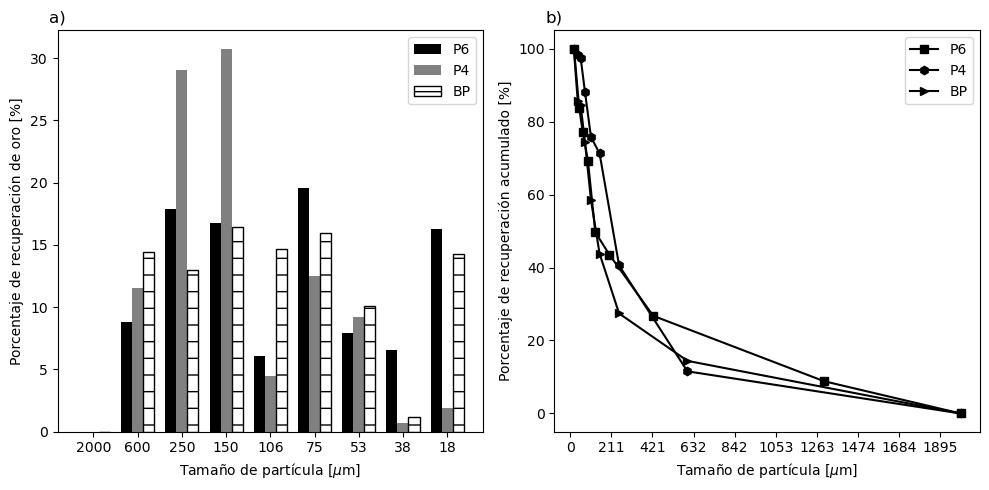

In [ ]:
#Graficar Resultados obtenidos
# Determinar el tamaño de la figura
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,5])
positions = np.arange(len(Results_P6['Yield']))
width = 0.25
recuperacion_p6 = ax1.bar(positions, Results_P6['Yield'], 
                          color='black',
                          label='P6',
                          width=width)
recuperacion_p4 = ax1.bar(positions + width, Results_P4['Yield'], 
                          color='gray',
                          label= 'P4',
                          width= width, 
                          tick_label=Results_P4['Particle size']
                         )
recuperacion_BP = ax1.bar(positions + 2*width, Results_BP['Yield'], 
                        color='white',
                        label= 'BP',
                          hatch = '-',
                          edgecolor= 'k',
                         width= width)
positions + width, Results_P4['Particle size']
ax1.set_title('a)', position=[0, 1] ) # Recuperacíon en cada malla

ax1.set_xlabel(r'Tamaño de partícula [$\mu$m]')
ax1.set_ylabel('Porcentaje de recuperación de oro [%]')
ax1.legend()
recuperacion_acumulada_p6 = ax2.plot(Results_P6['Particle size'], Recuperacion_acumulada_P6,
                                     '-s', 
                                     color='black',
                                     label='P6' )
recuperacion_acumulada_p4 = ax2.plot(Results_P4['Particle size'], Recuperacion_acumulada_P4,
                                     '-h', 
                                     color='black',
                                     label='P4' )
recuperacion_acumulada_bp = ax2.plot(Results_BP['Particle size'], Recuperacion_acumulada_BP,
                                     '->', 
                                     color='black',
                                     label='BP' )
ax2.set_xticks(ticks[::2])  # Show every second tick


ax2.set_xlabel(r'Tamaño de partícula [$\mu$m]')
ax2.set_ylabel('Porcentaje de recuperación acumulado [%]')
ax2.set_title('b)', position=[0, 1])
ax2.legend()

plt.tight_layout()
plt.show()




# Curva de Molienda

Revisar el archivo enfocado en los cácluos de [curvas de molienda](Curvas_de_Molienda.ipynb)

# Relave como una función del tiempo

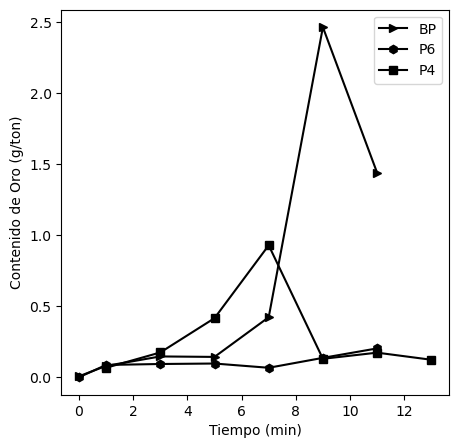

In [ ]:
#Función para determinar la respectiva gráfica
def graf_relvstime(Archive, blanco):
# Lectura de datos
       data = pd.read_csv(Archive)
# content = (Atomic Absorption result [mg/L] * 1g / 1000 mg * 1 L/1000 mL * 10mL) / (sample mass g * 1 ton /1e6 g )
# Extraer datos
       gold_law = [i * 10 / j for i, j in zip(list(data.loc[:, 'Concentration'] - blanco), list(data['Peso Fundido']))]
       dic = {'Time (min)': data.loc[:, 'Time'], 'Concentration_value (mg/L)': data.loc[:, 'Concentration'],
              'Gold_law (g/ton)': gold_law}
# Generar nuevo set de datos
       set_datos = pd.DataFrame(dic)
       return set_datos


set_datos_BP = graf_relvstime('../data/tailing_v_time/Concentration_Relave_vs_tiempo_rawdata_BP.csv', 0.01)
set_datos_P6 = graf_relvstime('../data/tailing_v_time/Concentration_Relave_vs_tiempo_rawdata_P6.csv', 0.01)
set_datos_P4 = graf_relvstime('../data/tailing_v_time/Concentration_Relave_vs_tiempo_rawdata_P4.csv', 0.05)
#Graficar resultados obtenidos
figure = plt.figure(figsize=[5,5])
ax = plt.axes()
ax.plot(set_datos_BP['Time (min)'], set_datos_BP['Gold_law (g/ton)'], '>-k' , label= 'BP')
ax.plot(set_datos_P6['Time (min)'], set_datos_P6['Gold_law (g/ton)'],  'h-k', label= 'P6')
ax.plot(set_datos_P4['Time (min)'], set_datos_P4['Gold_law (g/ton)'],  's-k', label= 'P4')

ax.set_xlabel('Tiempo (min)')
ax.set_ylabel('Contenido de Oro (g/ton)')
ax.legend(loc='best')
"""
ax.annotate('Para BP se realizó un corte en el caudal de fluidización\n'
            'que posteriormente se reinició',
            xy=(0.1, .8), xytext=(0.01,1.01), textcoords='axes fraction ')
"""
plt.savefig('Figuras/Relave_vs_tiempo_final.png', dpi=figure.dpi, bbox_inches='tight')
plt.show()

# En el caso del Bp debido a la distribución de otro en todo su rango granulométrico. A partir de la 
# cual se evidencia una recuperación de oro dentro del cono concentrador del equipo empleado y su posible saturación.
# Se paró le procesamiento en el minuto 5.
# Se fundamenta

# Porcentaje de recuperación